In [73]:
#Task1
from textblob import TextBlob

# Sentiment analysis function
def sentimentAnalyzer(text):
    blob = TextBlob(text)  # Create TextBlob object
    score = blob.sentiment.polarity  # Get polarity score
    if score < -0.2:
        return 'Negative'
    elif score <= 0.2:
        return 'Neutral'
    else:
        return 'Positive'


In [75]:
# Task2
test_words = ['happy', 'exciting', 'sad', 'food']

# Print results for each test case
for word in test_words:
    sentiment = sentimentAnalyzer(word)
    print(f"Word: {word}, Sentiment: {sentiment}")


Word: happy, Sentiment: Positive
Word: exciting, Sentiment: Positive
Word: sad, Sentiment: Negative
Word: food, Sentiment: Neutral


In [77]:
#Task3
import pandas as pd

# Load the dataset
file_path = "Amazon_Unlocked_Mobile.csv"  
df = pd.read_csv(file_path)

# Drop rows with null reviews
df = df.dropna(subset=["Reviews"])  

# Select a specific product
product_name = "Apple iPhone 4 32GB (Black) - AT&T"
df = df[df["Product Name"] == product_name]

# Ensure at least 1000 reviews
if len(df) < 1000:
    print(f"Not enough reviews for {product_name}.")
else:
    print(f"Filtered dataset for {product_name} contains {len(df)} reviews.")

# Describe the filtered dataset
shortest_review = df["Reviews"].str.len().min()
longest_review = df["Reviews"].str.len().max()
average_length = df["Reviews"].str.len().mean()
num_columns = len(df.columns)
num_rows = len(df)


print("\nDataset Details:")
print(f"Product Name: {product_name }")
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")
print(f"Shortest review: {shortest_review} characters")
print(f"Longest review: {longest_review} characters")
print(f"Average review length: {average_length:.2f} characters")


Filtered dataset for Apple iPhone 4 32GB (Black) - AT&T contains 1007 reviews.

Dataset Details:
Product Name: Apple iPhone 4 32GB (Black) - AT&T
Number of Rows: 1007
Number of Columns: 6
Shortest review: 1 characters
Longest review: 2572 characters
Average review length: 163.63 characters


In [78]:
#Task4
# Apply sentiment analysis using list comprehension
df["Sentiment"] = [sentimentAnalyzer(review) for review in df["Reviews"]]

# Display the first few rows
print(df.head())

                            Product Name Brand Name  Price  Rating  \
7624  Apple iPhone 4 32GB (Black) - AT&T      Apple  99.99       5   
7625  Apple iPhone 4 32GB (Black) - AT&T      Apple  99.99       5   
7626  Apple iPhone 4 32GB (Black) - AT&T      Apple  99.99       4   
7627  Apple iPhone 4 32GB (Black) - AT&T      Apple  99.99       3   
7628  Apple iPhone 4 32GB (Black) - AT&T      Apple  99.99       5   

                                                Reviews  Review Votes  \
7624                                           Perfect!           0.0   
7625                        I still use it, works great           0.0   
7626  Phone as arrived better condition than descrip...           0.0   
7627                                           thak you           0.0   
7628  Arrived in condition as advertised. I did not ...           0.0   

     Sentiment  
7624  Positive  
7625  Positive  
7626  Positive  
7627   Neutral  
7628  Positive  


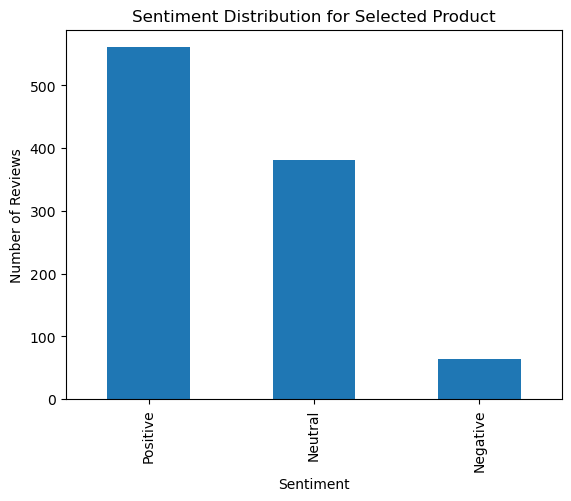

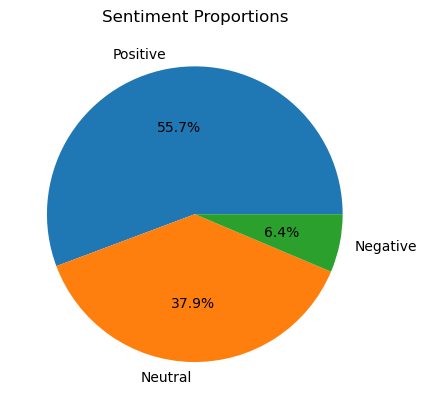

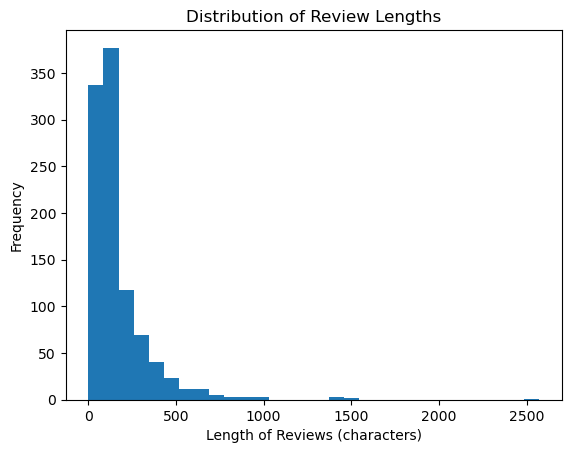

In [89]:
#Task5
import matplotlib.pyplot as plt

# Count sentiment occurrences
sentiment_counts = df["Sentiment"].value_counts()

# Bar plot for sentiment distribution
sentiment_counts.plot(kind='bar', title="Sentiment Distribution for Selected Product")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

# Pie chart for sentiment distribution
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', title="Sentiment Proportions", ylabel="")
plt.show()

# Histograms for review lengths
df["Review Length"] = df["Reviews"].str.len()
df["Review Length"].plot(kind='hist', bins=30, title="Distribution of Review Lengths")
plt.xlabel("Length of Reviews (characters)")
plt.ylabel("Frequency")
plt.show()



In [91]:
# Display examples of reviews with sentiments
print("Examples of Positive Sentiment:")
print(df[df["Sentiment"] == "Positive"]["Reviews"].head(3))

print("\nExamples of Negative Sentiment:")
print(df[df["Sentiment"] == "Negative"]["Reviews"].head(3))

print("\nExamples of Neutral Sentiment:")
print(df[df["Sentiment"] == "Neutral"]["Reviews"].head(3))

Examples of Positive Sentiment:
7624                                             Perfect!
7625                          I still use it, works great
7626    Phone as arrived better condition than descrip...
Name: Reviews, dtype: object

Examples of Negative Sentiment:
7635    The home button sticks bad. You have to push a...
7645    It didn't work. The microphone wouldn't work h...
7703    did not function well - very disappointed in t...
Name: Reviews, dtype: object

Examples of Neutral Sentiment:
7627                                             thak you
7629    We had a question about the iPhone and the dea...
7630                          defective, had to send back
Name: Reviews, dtype: object


In [93]:
# Get all reviews with Negative sentiment
negative_reviews = df[df["Sentiment"] == "Negative"]

# Check if there are any negative reviews
if len(negative_reviews) > 0:
    print(f"Number of Negative Reviews: {len(negative_reviews)}")
    
    # Combine all negative reviews into a single text
    all_negative_text = " ".join(negative_reviews["Reviews"]).lower()

    # Split the text into words
    words = all_negative_text.split()

    # Use TextBlob to find negative words
    negative_words = []
    for word in words:
        blob = TextBlob(word)
        if blob.sentiment.polarity < -0.2:  # Check if the word is negative
            negative_words.append(word)

    # Count occurrences of each negative word
    word_counts = {}
    for word in negative_words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

    # Find the top 10 most common negative words
    common_complaints = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:10]

    print("\nCommon Complaints (Most Frequent Negative Words):")
    for word, count in common_complaints:
        print(f"{word}: {count}")
else:
    print("No negative reviews found. Great job!")


Number of Negative Reviews: 64

Common Complaints (Most Frequent Negative Words):
bad: 14
disappointed: 13
worst: 6
unable: 4
bad.: 3
stupid: 3
disappointing.: 3
ill: 3
broken: 3
hard: 2


In [95]:
# Check if the 'Rating' column exists in the dataset
if "Rating" in df.columns:
    print("Checking for mismatched sentiment and ratings...")

    # Define a threshold for ratings (e.g., 1-2 as negative, 4-5 as positive)
    incorrect_sentiments = df[
        ((df["Rating"] <= 2) & (df["Sentiment"] == "Positive")) |  # Low rating, positive sentiment
        ((df["Rating"] >= 4) & (df["Sentiment"] == "Negative"))    # High rating, negative sentiment
    ]

    if not incorrect_sentiments.empty:
        print("\nExamples of Incorrect Sentiment Assignments:")
        print(incorrect_sentiments[["Reviews", "Rating", "Sentiment"]].head())

        print("\nWhy TextBlob might have made these mistakes:")
        print("- Sarcasm can confuse TextBlob (e.g., 'Great phone, broke in 2 days').")
        print("- Mixed opinions in one review (e.g., 'Good camera, terrible battery') might cause errors.")
        print("- Unusual wording or uncommon expressions may confuse TextBlob.")
    else:
        print("No mismatched sentiment and ratings found. Well done!")
else:
    print("No 'Rating' column found, so we can't check for mismatched sentiment.")


Checking for mismatched sentiment and ratings...

Examples of Incorrect Sentiment Assignments:
                                                Reviews  Rating Sentiment
7646  The phone does NOT work right, and never has. ...       1  Positive
7679  Was defective. The keyboard started messing up...       1  Positive
7686  SHIPPED A 16 GB WITH A FAKE PAPER PRINTED 32 G...       1  Positive
7698  It's not bad for the price, but there is lots ...       2  Positive
7768  I bought this for my girlfriend for Christmas,...       1  Positive

Why TextBlob might have made these mistakes:
- Sarcasm can confuse TextBlob (e.g., 'Great phone, broke in 2 days').
- Mixed opinions in one review (e.g., 'Good camera, terrible battery') might cause errors.
- Unusual wording or uncommon expressions may confuse TextBlob.


In [61]:
#Task 6
out_csv= "filtered_reviews_with_sentiments.csv"

# Export the DataFrame to a CSV file
df.to_csv(out_csv)

